In [96]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Census data, NHGIS shapefiles, Orlando neighborhood shapefiles
data = pd.read_csv('E:/.Personal Data/Misc/Docs/School/Fall 2022 (The end)/assets2/nhgis0012_ds244_20195_blck_grp.csv')
shapes = gpd.read_file('E:/.Personal Data/Misc/Docs/School/Fall 2022 (The end)/assets2/FL_blck_grp_2019.shp')
places = gpd.read_file('E:/.Personal Data/Misc/Docs/School/Fall 2022 (The end)/assets2/OrlandoNeighborhoods.shp')

# Narrow down data to county level
city_blocks = data[data['COUNTY'] == 'Orange County']

# Merge census data and NHGIS shapefiles
cols = ['GISJOIN', 'AL1YE013']
city_blocks_map = shapes.merge(city_blocks.loc[:, cols], 
                                           how='inner', 
                                           on='GISJOIN',
                                           validate='one_to_one')

# Select correct geography
orlando = city_blocks_map.sjoin_nearest(places.to_crs("ESRI:102003"), how="right")
orlando = orlando.to_crs("EPSG:4269")
outline = orlando.dissolve(by=orlando.columns[0], 
                                   aggfunc='first')


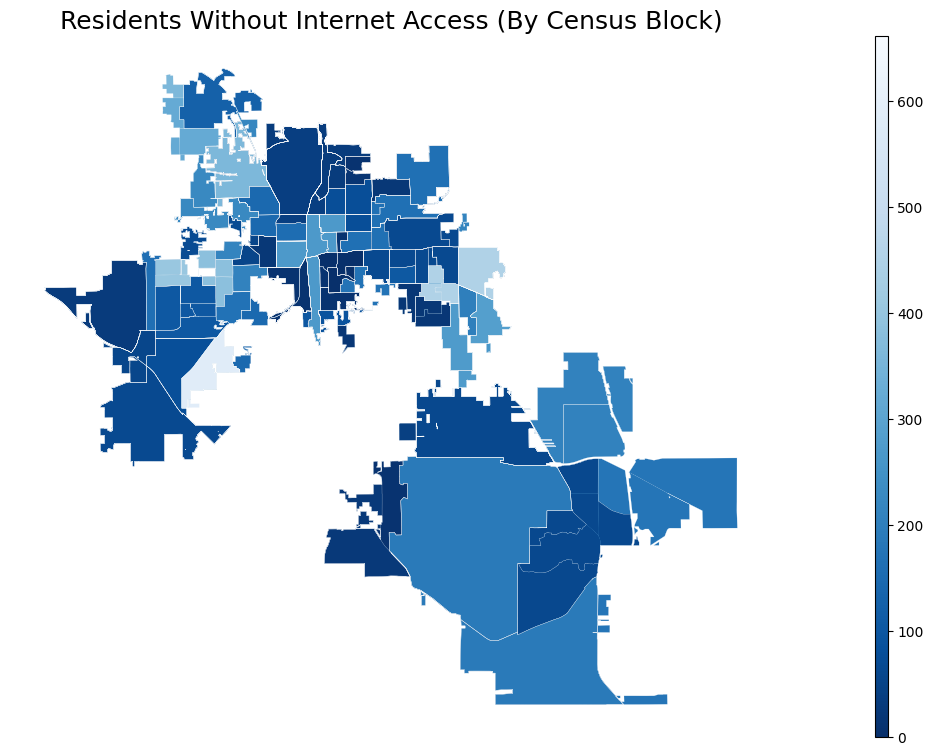

In [97]:
# Plot map
fig, ax = plt.subplots(figsize=(12,12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1.5%", pad=.5)
orlando.plot(ax=ax, 
                    column='AL1YE013', 
                    cmap='Blues_r',
                    legend=True, 
                    cax=cax,
                    missing_kwds={"color": "lightgrey"},
                   )
outline.plot(ax=ax, 
             facecolor='none', 
             edgecolor='white', 
             linewidth=.15)
ax.set_title('Residents Without Internet Access (By Census Block)', fontsize=18)
ax.axis('off')
plt.show()